In [10]:
import matplotlib.pyplot as plt
import pandas as pd

from pmdarima import auto_arima

In [11]:
gdp = pd.read_excel('data/gdp.xls')

display(gdp)

,period,value
0,1955-03-31,145457
1,1955-06-30,145551
2,1955-09-30,147995
3,1955-12-31,147119
4,1956-03-31,148955
...,...,...
278,2024-09-30,696853
279,2024-12-31,698780
280,2025-03-31,703435
281,2025-06-30,704973


In [12]:
gdp10 = gdp[gdp['period'] >= '2016-01-01']
display(gdp10)

,period,value
244,2016-03-31,625099
245,2016-06-30,629697
246,2016-09-30,632477
247,2016-12-31,636392
248,2017-03-31,642463
249,2017-06-30,647944
250,2017-09-30,652329
251,2017-12-31,657225
252,2018-03-31,657741
253,2018-06-30,659172


In [13]:
gdp10_model = auto_arima(gdp10['value'], seasonal=True, m=4, suppress_warnings=True)
print(gdp10_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -441.549
Date:                Tue, 27 Jan 2026   AIC                            885.097
Time:                        23:18:57   BIC                            886.735
Sample:                             0   HQIC                           885.680
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.061e+08   5.49e+07     12.851      0.000    5.98e+08    8.14e+08
Ljung-Box (L1) (Q):                   3.53   Jarque-Bera (JB):               403.62
Prob(Q):                              0.06   Pr

In [14]:
gdp10_forecast = gdp10_model.predict(n_periods=5)
display(gdp10_forecast)

283    705603.0
284    705603.0
285    705603.0
286    705603.0
287    705603.0
dtype: float64

In [15]:
# Create gdp10_total with original values and forecast
last_date = gdp10['period'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=6, freq='QE')[1:]  # Start from next month

# Create dataframe with forecast data
forecast_df = pd.DataFrame({
    'period': forecast_dates,
    'value': gdp10_forecast
})

# Combine original data with forecast
gdp10_total = pd.concat([gdp10, forecast_df], ignore_index=True)

display(gdp10_total)

,period,value
0,2016-03-31,625099.0
1,2016-06-30,629697.0
2,2016-09-30,632477.0
3,2016-12-31,636392.0
4,2017-03-31,642463.0
5,2017-06-30,647944.0
6,2017-09-30,652329.0
7,2017-12-31,657225.0
8,2018-03-31,657741.0
9,2018-06-30,659172.0


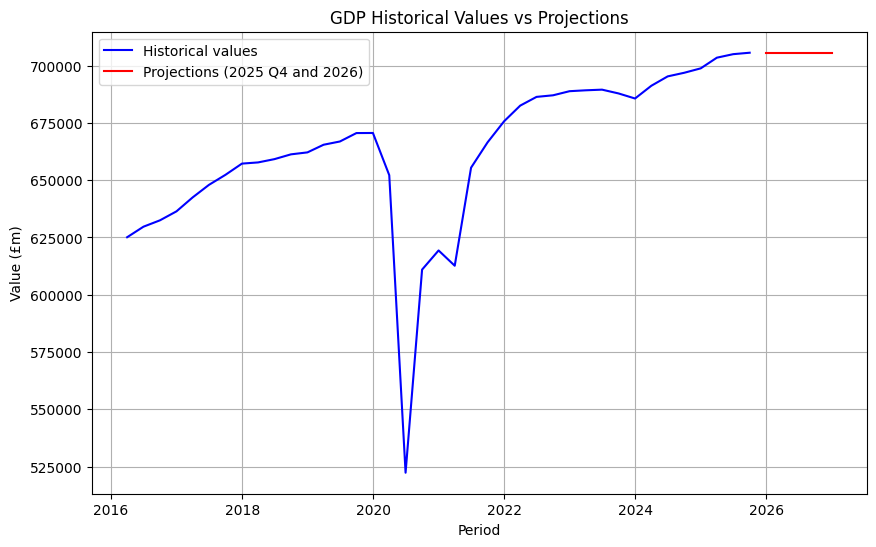

In [16]:
plt.figure(figsize=(10, 6))

# Split data: blue for up to 2025, red for 2026 projections
historical_data = gdp10_total[gdp10_total['period'] <= '2025-09-30']
projection_data = gdp10_total[gdp10_total['period'] > '2025-09-30']

plt.plot(historical_data['period'], historical_data['value'], label='Historical values', color='blue')
plt.plot(projection_data['period'], projection_data['value'], label='Projections (2025 Q4 and 2026)', color='red')

plt.title('GDP Historical Values vs Projections')
plt.xlabel('Period')
plt.ylabel('Value (£m)')
plt.legend()
plt.grid(True)

plt.savefig('img/gdp10.png', dpi=300)
plt.show()